In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint


In [4]:
train_dir = 'dataset/train'
val_dir = 'dataset/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), class_mode='categorical', batch_size=32
)

val_data = val_datagen.flow_from_directory(
    val_dir, target_size=(128, 128), class_mode='categorical', batch_size=32
)


Found 2504 images belonging to 3 classes.
Found 2504 images belonging to 3 classes.


In [5]:
from keras.layers import Input

# Use Input layer to specify input shape
model = Sequential([
    Input(shape=(128, 128, 3)),  # Define input shape properly

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # SUV, Sedan, Hatchback
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
from keras.callbacks import ModelCheckpoint

# Define the checkpoint with the new Keras format
checkpoint = ModelCheckpoint('model_checkpoints/car_classifier.keras', save_best_only=True)

# Train the model with the checkpoint callback
model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[checkpoint])


Epoch 1/10


C:\ProgramData\Anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 297ms/step - accuracy: 0.6001 - loss: 1.0679 - val_accuracy: 0.9605 - val_loss: 0.1729
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 274ms/step - accuracy: 0.9482 - loss: 0.1594 - val_accuracy: 0.9980 - val_loss: 0.0360
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 272ms/step - accuracy: 0.9891 - loss: 0.0519 - val_accuracy: 0.9996 - val_loss: 0.0086
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 292ms/step - accuracy: 0.9942 - loss: 0.0197 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 274ms/step - accuracy: 0.9968 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 4.9216e-04
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 268ms/step - accuracy: 0.9956 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 5.9146e-04
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step - accuracy: 0.9975 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 4.7483e-04
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 276ms/step - accuracy: 0.9976 - loss: 0.0097 - val_acc

In [7]:
def predict_body_type(image_name):
    # Load the trained model
    model = load_model('model_checkpoints/car_classifier.keras')  # Load model in Keras format
    
    # Full path to the image
    file_path = f"test_images/{image_name}.jpg"

    # Read and preprocess the image
    img = cv2.imread(file_path)
    if img is None:
        print(f"Error: Image '{file_path}' not found.")
        return

    # Resize the image to fit the model's expected input shape
    img_resized = cv2.resize(img, (128, 128)) / 255.0
    img_input = np.expand_dims(img_resized, axis=0)

    # Class labels
    classes = ['Hatchback', 'Sedan', 'SUV']

    # Predict the class probabilities
    prediction = model.predict(img_input)[0]

    # Get the class with the highest probability
    predicted_index = np.argmax(prediction)
    predicted_class = classes[predicted_index]
    confidence = prediction[predicted_index] * 100  # Confidence in percentage

    # Show the image along with the prediction
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}% confidence)")
    plt.axis('off')
    plt.show()

    return f"Predicted: {predicted_class} ({confidence:.2f}% confidence)"


Enter the name of the car image (without extension): 00110
🔍 Predicting from .jpg image... please wait


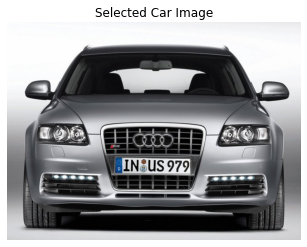

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

✅ Predicted Body Type: SUV
🎯 Confidence: 100.00%


In [16]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load your model
model = load_model('model_checkpoints/car_classifier.keras')
class_labels = ['SUV', 'Sedan', 'Hatchback']  # Modify if needed

# Prediction function
def predict_image(file_path):
    img = Image.open(file_path).resize((128, 128))
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    confidence = np.max(prediction)
    return class_labels[class_index], confidence

# Main wrapper function
def predict_body_type(image_name):
    base_path = "C:/Users/ASUS/Documents/Car_Classifier_Project/test_images/"
    jpg_path = os.path.join(base_path, f"{image_name}.jpg")
    png_path = os.path.join(base_path, f"{image_name}.png")

    if os.path.exists(jpg_path):
        print("🔍 Predicting from .jpg image... please wait")
        img_path = jpg_path
    elif os.path.exists(png_path):
        print("🔍 Predicting from .png image... please wait")
        img_path = png_path
    else:
        return "❌ Image not found.", 0.0

    # Show image inline using matplotlib
    img_display = Image.open(img_path)
    plt.imshow(img_display)
    plt.axis("off")
    plt.title("Selected Car Image")
    plt.show()

    return predict_image(img_path)

# Input and Output
image_name = input("Enter the name of the car image (without extension): ")
result, confidence = predict_body_type(image_name)

if confidence > 0:
    print(f"\n✅ Predicted Body Type: {result}")
    print(f"🎯 Confidence: {confidence * 100:.2f}%")
else:
    print(result)


In [13]:
import cv2
import os

def predict_body_type(image_name):
    base_path = "C:/Users/ASUS/Documents/Car_Classifier_Project/test_images/"
    jpg_path = os.path.join(base_path, f"{image_name}.jpg")
    png_path = os.path.join(base_path, f"{image_name}.png")

    if os.path.exists(jpg_path):
        print("🔍 Predicting from .jpg image... please wait")
        img_path = jpg_path
    elif os.path.exists(png_path):
        print("🔍 Predicting from .png image... please wait")
        img_path = png_path
    else:
        return "❌ Image not found.", 0.0

    # Show image
    img = cv2.imread(img_path)
    cv2.imshow("Selected Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return predict_image(img_path)


79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step


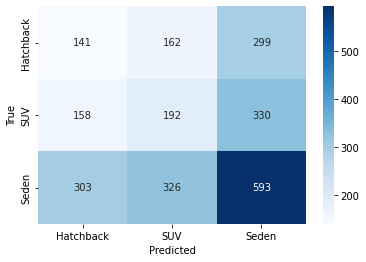

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(val_data)
y_pred = np.argmax(y_pred, axis=1)

# True labels from validation data
y_true = val_data.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Visualizing Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices, yticklabels=val_data.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [21]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import os
import pyttsx3
import threading
from tensorflow.keras.models import load_model

# Pre-load model
model = load_model('model_checkpoints/car_classifier.keras')
class_labels = ['SUV', 'Sedan', 'Hatchback']

# Voice setup
engine = pyttsx3.init()
engine.setProperty('rate', 200)  # Increase speed to minimize delay
engine.setProperty('volume', 1)

# Function to run the voice output in a separate thread
def speak(text):
    engine.say(text)
    engine.runAndWait()

# Prediction function
def predict_image(file_path):
    img = Image.open(file_path).resize((128, 128))
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    confidence = np.max(prediction)
    return class_labels[class_index], confidence

# GUI
app = tk.Tk()
app.title("Car Type ChatBot")
app.geometry("600x600")
app.configure(bg="#1e1e1e")

chat_frame = tk.Frame(app, bg="#1e1e1e")
chat_frame.pack(fill=tk.BOTH, expand=True, padx=20, pady=10)

def add_bot_message(msg):
    label = tk.Label(chat_frame, text="🤖 " + msg, bg="#2d2d2d", fg="white", anchor="w", justify="left", font=("Segoe UI", 10), wraplength=500)
    label.pack(fill="x", pady=5, padx=10, anchor="w")

def add_user_message(msg):
    label = tk.Label(chat_frame, text="🧑 " + msg, bg="#3d3d3d", fg="lightgreen", anchor="e", justify="right", font=("Segoe UI", 10), wraplength=500)
    label.pack(fill="x", pady=5, padx=10, anchor="e")

def show_image_preview(path):
    img = Image.open(path)
    img.thumbnail((400, 300))
    img = ImageTk.PhotoImage(img)
    panel = tk.Label(chat_frame, image=img, bg="#1e1e1e")
    panel.image = img
    panel.pack(pady=10)

def choose_image():
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg *.png")])
    if not file_path:
        return
    file_name = os.path.basename(file_path)

    add_user_message(f"I want to predict: {file_name}")
    show_image_preview(file_path)
    add_bot_message("Processing the image... please wait 🤖")

    result, confidence = predict_image(file_path)

    msg = f"This car looks like a **{result}** with {confidence*100:.2f}% confidence."
    add_bot_message(msg)

    # Run voice in a separate thread to avoid delay in UI
    threading.Thread(target=speak, args=(f"This car is a {result} with {confidence*100:.1f} percent confidence",)).start()

    add_bot_message("Need help with another image? Just click below! 😊")

choose_btn = tk.Button(app, text="Choose Car Image", command=choose_image, bg="#4CAF50", fg="white", font=("Segoe UI", 12, "bold"), padx=20, pady=10)
choose_btn.pack(pady=10)

# Start with welcome
add_bot_message("Hello! I'm your Car Type Classifier Bot 🚗")
add_bot_message("Please upload an image of a car, and I'll tell you whether it's an SUV, Sedan, or Hatchback.")

app.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
